## Name: Dhruv Vudayagiri
## Student ID: 220375472

In [2]:
# Imported libraries to work with the data
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#read the data
cars=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
#checking the shape of the data
cars.shape

(4340, 8)

## Preprocessing 

In [5]:
#checking for duplicates values
cars.duplicated().sum()

763

In [6]:
#seeing duplicate values
cars[cars.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [7]:
#sorting duplicates by ascending order
cars.sort_values(by=['name','year','selling_price','km_driven'],ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3912,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
4016,Ambassador CLASSIC 1500 DSL AC,2005,120000,50000,Diesel,Individual,Manual,Second Owner
2878,Ambassador Classic 2000 Dsz,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner
3465,Ambassador Grand 1800 ISZ MPFI PW CL,2012,430000,50000,Petrol,Individual,Manual,Second Owner
3458,Audi A4 1.8 TFSI,2012,1200000,60000,Petrol,Individual,Automatic,Third Owner
...,...,...,...,...,...,...,...,...
1573,Volkswagen Vento Petrol Highline AT,2011,300000,70000,Petrol,Individual,Automatic,Third Owner
103,Volvo V40 D3 R Design,2018,1975000,21000,Diesel,Dealer,Automatic,First Owner
4047,Volvo XC 90 D5 Inscription BSIV,2017,4500000,80000,Diesel,Individual,Automatic,First Owner
3320,Volvo XC60 D3 Kinetic,2012,1750000,115992,Diesel,Dealer,Automatic,Third Owner


In [8]:
#removed the duplicates
cars=cars.drop_duplicates()

In [9]:
#re-checking for duplicates values
cars.duplicated().sum()

0

In [10]:
#added the vehicle age column by using current_year variable
current_year=2022
cars['vehicle_age']=current_year-cars['year']
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,vehicle_age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [11]:
#added new column by brand name
"""
    Method Name: using the lambda and split functions
    Description: Here, used the lambda function and the split function to separate the specific brands of cars, 
                 which was saved in a new variable called "brand"
    Output: All brand's name
"""
#added new column by brand name
cars['name']=cars['name'].astype(str)
cars.insert(loc=0, column="brand", value=cars.name.apply(lambda x : (x.split(' ')[0])))
cars.head()

,brand,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,vehicle_age
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [12]:
#added the model column using name column
"""
    Method Name: using the lambda and split functions
    Description: Here, used the lambda function and the split function to separate the specific names of cars, 
                 which was saved in a new variable called "model"
    Output: All model name
"""
cars.insert(loc=1, column="model", value=cars.name.apply(lambda x : ' '.join(x.split(' ')[1:])))
cars.head()

,brand,model,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,vehicle_age
0,Maruti,800 AC,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,15
1,Maruti,Wagon R LXI Minor,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,15
2,Hyundai,Verna 1.6 SX,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,10
3,Datsun,RediGO T Option,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
4,Honda,Amaze VX i-DTEC,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [13]:
# View unique values from categorical features
categorical_columns = [columns for columns in cars.columns ]
print("Viewing unique values from each feature"+"\n")
for columns in categorical_columns:
    print(columns.upper()+"\n")
    print(cars[columns].unique())
    print("\n")

Viewing unique values from each feature

BRAND

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


MODEL

['800 AC' 'Wagon R LXI Minor' 'Verna 1.6 SX' ... 'Verito 1.5 D6 BSIII'
 'Innova 2.5 VX (Diesel) 8 Seater BS IV' 'i20 Magna 1.4 CRDi']


NAME

['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


YEAR

[2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]


SELLING_PRICE

[  60000  135000  600000  250000  450000  140000  550000  240000  850000
  365000  260000 1650000  585000 1195000  390000 1964999 1425000  975000
 1190000  930000  525000 1735000 1375000  

In [14]:
#checking description of the data
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3577.0,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0
vehicle_age,3577.0,9.037462,4.251759,2.0,6.0,9.0,12.0,30.0


## Data Visualisation

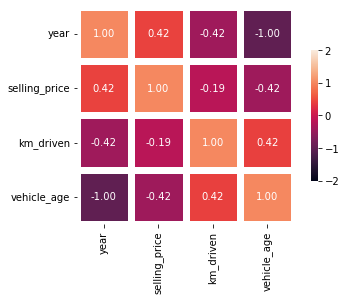

In [15]:
#We will display heatmap

"""
    Method Name: Heatmap
    Description: This is a heatmap plotting method. Created a heatmap to determine the correlation of some variables in the dataset. 
                 Using a user-provided dataset as input 
    Output: Correlation between the variables
"""

sns.heatmap(cars.corr(), annot=True, fmt=".2f", 
           linewidths=7, vmin=-2, vmax=2, 
           cbar_kws={"shrink": .6}, square=True)
plt.show()
# plt.savefig('correlation.png');

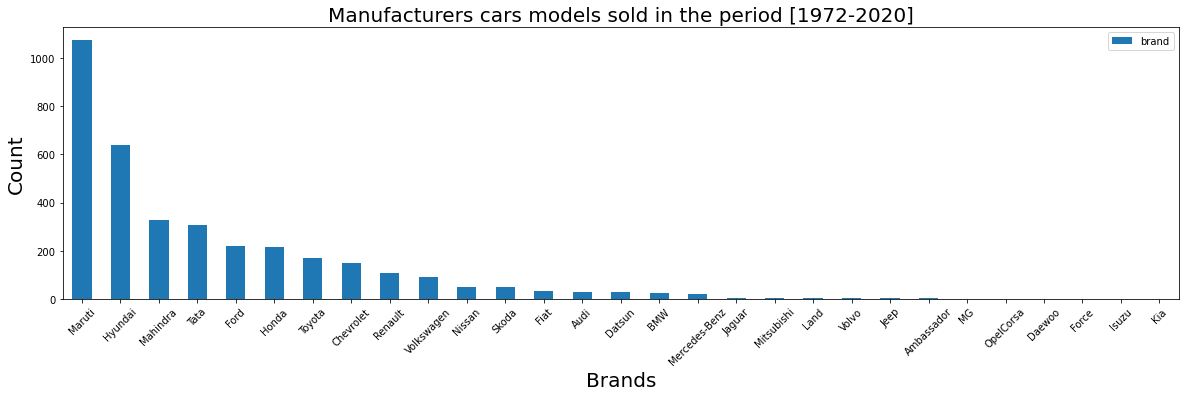

In [16]:
"""
    Method Name: Bar plot
    Description: This is a count plot plotting method. Ploted count plot about the brands and units they sold. 
                 Using the user's dataset as input
    Output: count_plot of between brands and units they sold
"""

cars["brand"].value_counts().plot(kind="bar",legend=True,figsize=(20,5))
plt.ylabel('Count',size=20)
plt.xlabel('Brands',size=20)
plt.xticks(rotation=45)
plt.title('Manufacturers cars models sold in the period [1972-2020]',size=20)
plt.show()

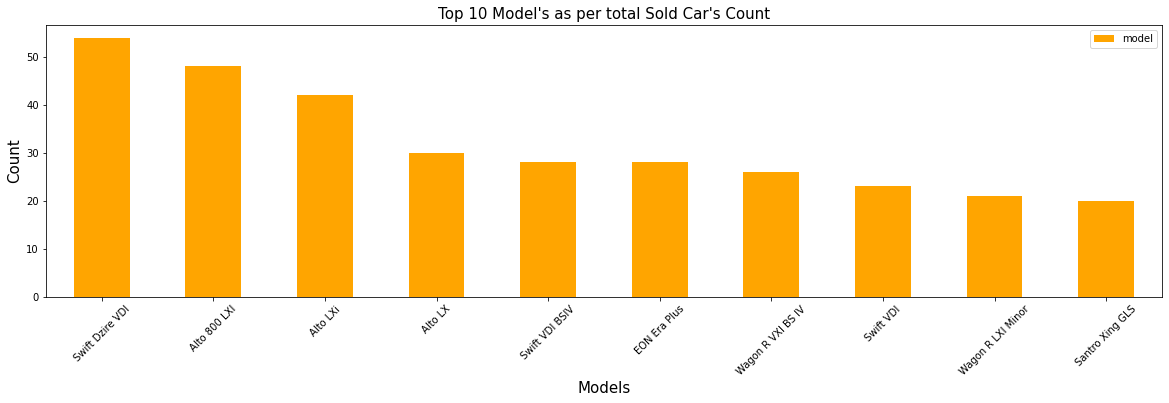

In [17]:
"""
    Method Name: Bar plot
    Description: This is a count plot plotting method. Ploted count plot about the Models and units they sold. 
                 Using the user's dataset as input
    Output: count_plot of between Models and units they sold
"""

cars["model"].value_counts().head(10).plot(kind="bar",color= 'orange',legend=True,figsize=(20,5))
plt.xlabel("Models",color="black",size=15)
plt.xticks(rotation=45)
plt.ylabel("Count",color="black",size=15)
plt.legend(loc="best")
plt.title("Top 10 Model's as per total Sold Car's Count",size=15)
plt.show()

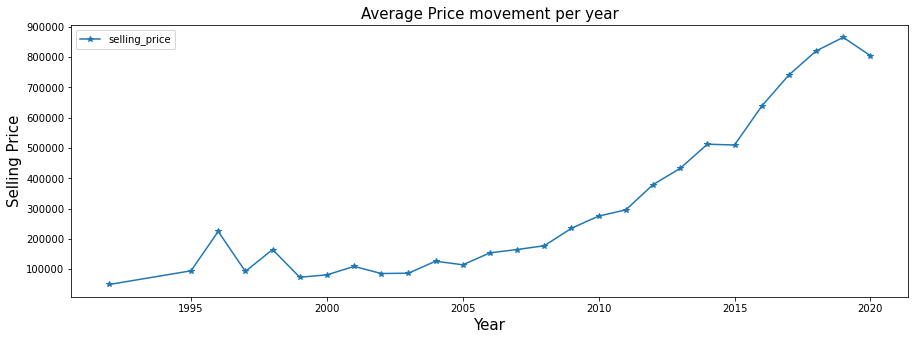

In [18]:
"""
    Method Name: Line plot
    Description: This is a line plot plotting method. Ploted average price movement per year for the vehicles. 
                 Using the user's dataset as input
    Output: Line plot for mean price movement per year
"""

cars_price_movement = cars.groupby(['year'])[['selling_price']].mean()
cars_price_movement.plot(marker='*',figsize=(15,5))
plt.title('Average Price movement per year',size=15)
plt.ylabel('Selling Price',size=15)
plt.xlabel('Year',size=15)
plt.legend(loc="best")
plt.show();

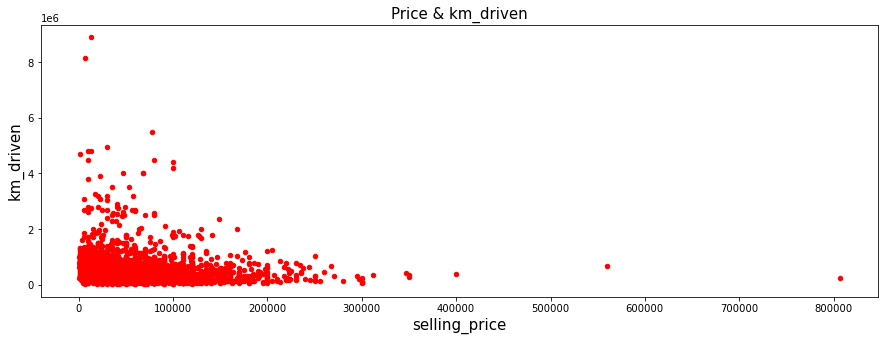

In [19]:
"""
    Method Name: Scatter plot
    Description: This is a Scatter plot plotting method. Scattered between price and km_driven for the vehicles. 
                 Using the user's dataset as input
    Output: Scatter plot for price and kilometers driven
"""

cars.plot(x="km_driven", y="selling_price", kind="scatter", figsize=(15, 5), color="red",legend=True)
plt.title("Price & km_driven",size=15)
plt.ylabel("km_driven",size=15)
plt.xlabel("selling_price",size=15)
plt.show();

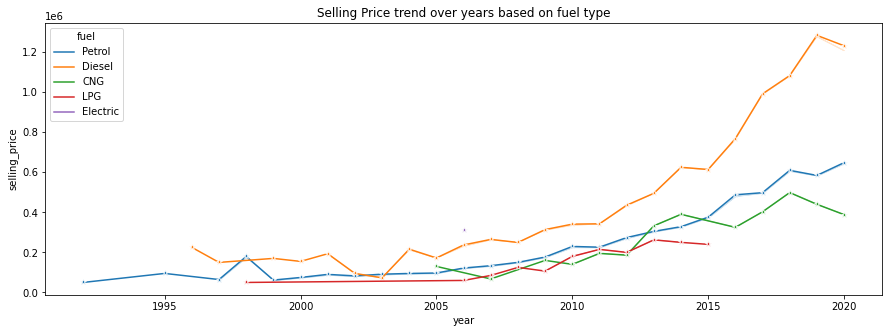

In [20]:
"""
    Method Name: Line plot
    Description: This is a Line plot plotting method. Plotted between year and price with the respective fuels for the vehicles. 
                 Using the user's dataset as input.
    Output: Line plot for year and selling price based on fuel types.
"""

plt.figure(figsize=(15,5))
sns.lineplot(data=cars, x="year", y="selling_price", hue="fuel", ci=False,marker="*")
plt.title("Selling Price trend over years based on fuel type");

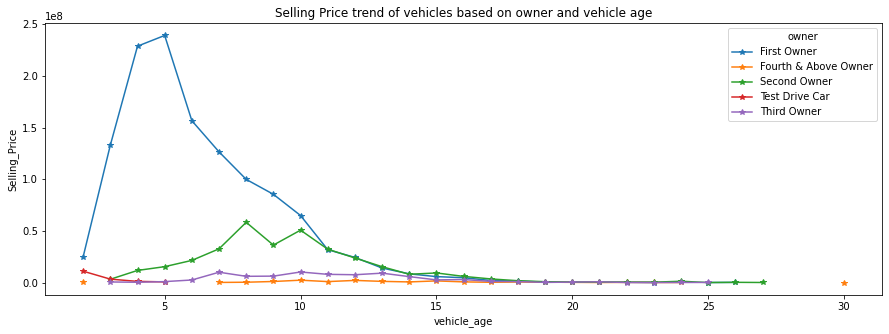

In [21]:
"""
    Method Name: Line plot
    Description: This is a Line plot plotting method. Plotted between vehicle age and selling price with the respective owner for the vehicles. 
                 Using the user's dataset as input.
    Output: Line plot for selling price and selling price based on owners.
"""

cars.groupby(['vehicle_age','owner'])['selling_price'].sum().unstack().plot(figsize=(15,5),marker="*")
plt.ylabel("Selling_Price")
plt.title("Selling Price trend of vehicles based on owner and vehicle age")
plt.show();

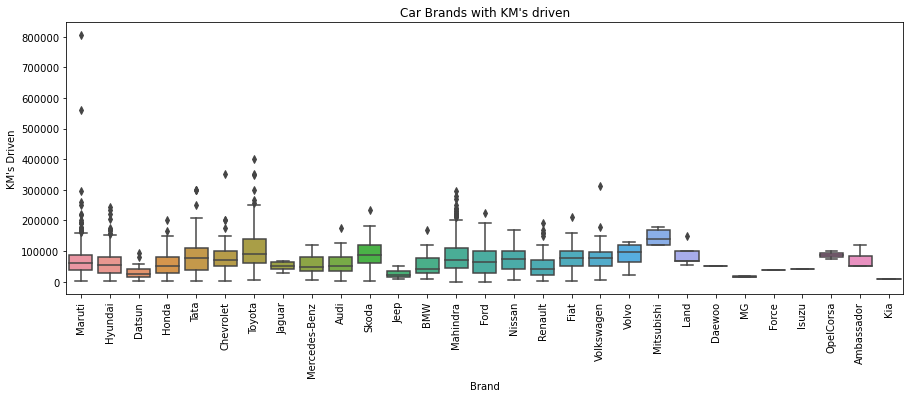

In [22]:
"""
    Method Name: Finding Outliers
    Description: This is an outlier method. The outlier data points will be calculated using the statistical method 
                 known as the interquartile range (IQR). Here, it determined whether outliers fall within the ranges 
                 of Q1 (25% of data) and Q2 (75% of data), and IQR represents the interquartile range calculated by 
                 subtracting Q3 from Q1 (Q3–Q1). 
    Output: number of outliers in the dataset
"""

f, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=cars["brand"].values, y = cars["km_driven"].values,ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("KM's Driven")
plt.title("Car Brands with KM's driven")
plt.show()